<a href="https://colab.research.google.com/github/MaazMahboob/GNCIPL-AI-ML-/blob/main/GNCIPL-AI-ML%20Week%201%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name: Exploratory Data Analysis on Disease Diagnosis Dataset


### Domain : Medical Science

### Project prepared by : Maaz Mahboob

## **Problem Statement**: The problem statement is to perform exploratory data analysis (EDA) on a disease diagnosis dataset. The goal is to preprocess the data, handle missing values, and explore relationships between different health parameters to gain insights that can support disease understanding and prediction.

#Coding Section

### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### STEP 1: DATASET LOADING

In [2]:
print("\n STEP 1: DATASET LOADING")
print("-"*80)


df = pd.read_csv('disease_diagnosis.csv')

# Create a copy for cleaning
df_clean = df.copy()

print("Dataset loaded successfully!")
print(f"Dataset Name: disease_diagnosis.csv")


 STEP 1: DATASET LOADING
--------------------------------------------------------------------------------
Dataset loaded successfully!
Dataset Name: disease_diagnosis.csv


###STEP 2: DATASET FIRST LOOK

In [3]:
print("\nSTEP 2: DATASET FIRST LOOK")
print("-"*80)

print("\nFirst 4 Rows of the Dataset:\n")
df_clean.head(4)


STEP 2: DATASET FIRST LOOK
--------------------------------------------------------------------------------

First 4 Rows of the Dataset:



,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids


### STEP 3: DATASET ROWS & COLUMNS COUNT

In [4]:
print("\n STEP 3: DATASET DIMENSIONS")
print("-"*80)

num_rows, num_columns = df_clean.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')


 STEP 3: DATASET DIMENSIONS
--------------------------------------------------------------------------------
Number of rows: 2000
Number of columns: 13


### STEP 4: DATASET INFORMATION

In [5]:
print("\n STEP 4: DATASET INFORMATION")
print("-"*80)

print("\nDataset Info:")
df_clean.info()


 STEP 4: DATASET INFORMATION
--------------------------------------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           2000 non-null   int64  
 1   Age                  2000 non-null   int64  
 2   Gender               2000 non-null   object 
 3   Symptom_1            2000 non-null   object 
 4   Symptom_2            2000 non-null   object 
 5   Symptom_3            2000 non-null   object 
 6   Heart_Rate_bpm       2000 non-null   int64  
 7   Body_Temperature_C   2000 non-null   float64
 8   Blood_Pressure_mmHg  2000 non-null   object 
 9   Oxygen_Saturation_%  2000 non-null   int64  
 10  Diagnosis            2000 non-null   object 
 11  Severity             2000 non-null   object 
 12  Treatment_Plan       2000 non-null   object 
dtypes: float64(1

###STEP 5: MISSING VALUES COUNT

In [6]:
print("\n STEP 5: MISSING VALUES COUNT")
print("-"*80)

print("\nMissing values count:\n")
missing_counts = df_clean.isnull().sum()
print(missing_counts)

print(f"\nTotal missing values: {missing_counts.sum()}")


 STEP 5: MISSING VALUES COUNT
--------------------------------------------------------------------------------

Missing values count:

Patient_ID             0
Age                    0
Gender                 0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Heart_Rate_bpm         0
Body_Temperature_C     0
Blood_Pressure_mmHg    0
Oxygen_Saturation_%    0
Diagnosis              0
Severity               0
Treatment_Plan         0
dtype: int64

Total missing values: 0


### STEP 6: VISUALIZING MISSING VALUES

In [7]:
print("\n STEP 6: VISUALIZING MISSING VALUES")
print("-"*80)

missing_data = df_clean.isnull().sum()

fig = px.bar(
    x=missing_data.index,
    y=missing_data.values,
    labels={'x': 'Columns', 'y': 'Missing Count'},
    title='Missing Values Count by Column',
    color=missing_data.values,
    color_continuous_scale='Reds'
)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(height=500, width=800)
fig.show()

total_missing = missing_data.sum()
if total_missing == 0:
    print("✓ No missing values found in the dataset! ✅")
else:
    print(f"⚠ Found {total_missing} missing values in the dataset.")




 STEP 6: VISUALIZING MISSING VALUES
--------------------------------------------------------------------------------


✓ No missing values found in the dataset! ✅


### STEP 7: UNDERSTANDING YOUR VARIABLES

In [8]:
print("\n STEP 7: UNDERSTANDING YOUR VARIABLES")
print("-"*80)

print("\nColumns Present in the Dataset:\n")
print(df_clean.columns.tolist())

print("\n\nData types of the columns:\n")
print(df_clean.dtypes)


 STEP 7: UNDERSTANDING YOUR VARIABLES
--------------------------------------------------------------------------------

Columns Present in the Dataset:

['Patient_ID', 'Age', 'Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Blood_Pressure_mmHg', 'Oxygen_Saturation_%', 'Diagnosis', 'Severity', 'Treatment_Plan']


Data types of the columns:

Patient_ID               int64
Age                      int64
Gender                  object
Symptom_1               object
Symptom_2               object
Symptom_3               object
Heart_Rate_bpm           int64
Body_Temperature_C     float64
Blood_Pressure_mmHg     object
Oxygen_Saturation_%      int64
Diagnosis               object
Severity                object
Treatment_Plan          object
dtype: object


### STEP 8: DATASET DESCRIPTION

In [9]:
print("\n STEP 8: DATASET DESCRIPTION")
print("-"*80)

print("\nDescription of the Dataset:")
df_clean.describe()


 STEP 8: DATASET DESCRIPTION
--------------------------------------------------------------------------------

Description of the Dataset:


,Patient_ID,Age,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.285000,89.439000,37.741000,94.493500
std,577.494589,17.422616,17.139608,1.309835,2.861827
min,1.000000,18.000000,60.000000,35.500000,90.000000
25%,500.750000,33.000000,75.000000,36.600000,92.000000
50%,1000.500000,49.000000,89.000000,37.700000,95.000000
75%,1500.250000,63.000000,104.000000,38.900000,97.000000
max,2000.000000,79.000000,119.000000,40.000000,99.000000


### STEP 9: CHECK UNIQUE VALUES

In [10]:
print("\n STEP 9: UNIQUE VALUES CHECK")
print("-"*80)

print("\nUnique Values in each Column:\n")
print(df_clean.nunique())


 STEP 9: UNIQUE VALUES CHECK
--------------------------------------------------------------------------------

Unique Values in each Column:

Patient_ID             2000
Age                      62
Gender                    2
Symptom_1                 8
Symptom_2                 8
Symptom_3                 8
Heart_Rate_bpm           60
Body_Temperature_C       46
Blood_Pressure_mmHg    1688
Oxygen_Saturation_%      10
Diagnosis                 5
Severity                  3
Treatment_Plan            3
dtype: int64


### STEP 10: VARIABLES DESCRIPTION

In [11]:
print("\n STEP 10: VARIABLES DESCRIPTION")
print("-"*80)

print("""
VARIABLE DESCRIPTIONS:
======================

DEMOGRAPHIC FEATURES:
---------------------
1. Patient_ID         : Unique identifier for each patient (Integer)
2. Age                : Age of the patient in years (18-79)
3. Gender             : Gender of patient (Male/Female)

SYMPTOM FEATURES:
-----------------
4. Symptom_1          : Primary symptom reported by patient
5. Symptom_2          : Secondary symptom reported
6. Symptom_3          : Tertiary symptom reported

VITAL SIGNS (SENSOR DATA):
--------------------------
7. Heart_Rate_bpm     : Heart rate in beats per minute (60-119 normal range)
8. Body_Temperature_C : Body temperature in Celsius (Normal: 36.5-37.5°C)
9. Blood_Pressure_mmHg: Blood pressure Systolic/Diastolic (e.g., 120/80)
10. Oxygen_Saturation_%: Blood oxygen saturation percentage (95-100% normal)

MEDICAL ASSESSMENT:
-------------------
11. Diagnosis         : Medical diagnosis (Healthy, Cold, Flu, Bronchitis, Pneumonia)
12. Severity          : Severity level (Mild, Moderate, Severe)
13. Treatment_Plan    : Recommended treatment approach
""")


 STEP 10: VARIABLES DESCRIPTION
--------------------------------------------------------------------------------

VARIABLE DESCRIPTIONS:

DEMOGRAPHIC FEATURES:
---------------------
1. Patient_ID         : Unique identifier for each patient (Integer)
2. Age                : Age of the patient in years (18-79)
3. Gender             : Gender of patient (Male/Female)

SYMPTOM FEATURES:
-----------------
4. Symptom_1          : Primary symptom reported by patient
5. Symptom_2          : Secondary symptom reported
6. Symptom_3          : Tertiary symptom reported

VITAL SIGNS (SENSOR DATA):
--------------------------
7. Heart_Rate_bpm     : Heart rate in beats per minute (60-119 normal range)
8. Body_Temperature_C : Body temperature in Celsius (Normal: 36.5-37.5°C)
9. Blood_Pressure_mmHg: Blood pressure Systolic/Diastolic (e.g., 120/80)
10. Oxygen_Saturation_%: Blood oxygen saturation percentage (95-100% normal)

MEDICAL ASSESSMENT:
-------------------
11. Diagnosis         : Medical diagn

### STEP 11: DATA WRANGLING

In [12]:
print("\n STEP 11: DATA WRANGLING")
print("-"*80)

print("\n1. REMOVE EXACT DUPLICATES")
print("-"*40)

print(f"Checking for duplicate rows...")
print(f"Duplicates found: {df_clean.duplicated().sum()}")

df_clean = df_clean.drop_duplicates()
print(f"Shape after removing duplicates: {df_clean.shape}")


 STEP 11: DATA WRANGLING
--------------------------------------------------------------------------------

1. REMOVE EXACT DUPLICATES
----------------------------------------
Checking for duplicate rows...
Duplicates found: 0
Shape after removing duplicates: (2000, 13)


### STEP 12: FIX INCONSISTENT ENTRIES

In [13]:
print("\n2. FIX INCONSISTENT ENTRIES")
print("-"*40)

print("Fixing inconsistent entries...")

# Standardize text columns - remove extra spaces
text_columns = ['Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3',
                'Diagnosis', 'Severity', 'Treatment_Plan']

for col in text_columns:
    df_clean[col] = df_clean[col].str.strip()

print("✓ Text standardization complete")


2. FIX INCONSISTENT ENTRIES
----------------------------------------
Fixing inconsistent entries...
✓ Text standardization complete


### STEP 13: HANDLE MISSING VALUES

In [14]:
print("\n3. HANDLE MISSING VALUES")
print("-"*40)

print("Handling missing values...\n")

num_cols = ["Age", "Heart_Rate_bpm", "Body_Temperature_C", "Oxygen_Saturation_%"]
for col in num_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
        print(f"  ✓ Filled {col} with median")

# Categorical columns - fill with mode
cat_cols = ["Gender", "Symptom_1", "Symptom_2", "Symptom_3",
            "Diagnosis", "Severity", "Treatment_Plan"]
for col in cat_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
        print(f"  ✓ Filled {col} with mode")

print(f"\nMissing values left: {df_clean.isnull().sum().sum()}")


3. HANDLE MISSING VALUES
----------------------------------------
Handling missing values...


Missing values left: 0


### STEP 14: DETECT & TREAT OUTLIERS

In [15]:
print("\n4. DETECT & TREAT OUTLIERS")
print("-"*40)

print("Detecting and treating outliers...\n")

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Patient_ID']

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers_count = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()

    if outliers_count > 0:
        median_val = df_clean[col].median()
        df_clean.loc[df_clean[col] < lower, col] = median_val
        df_clean.loc[df_clean[col] > upper, col] = median_val
        print(f"  ✓ {col}: {outliers_count} outliers treated")

print("\n✓ Outlier treatment complete")


4. DETECT & TREAT OUTLIERS
----------------------------------------
Detecting and treating outliers...


✓ Outlier treatment complete


### STEP 15: SCALING & NORMALIZATION

In [16]:
from sklearn.preprocessing import MinMaxScaler

print("\n5. SCALING NUMERICAL FEATURES")
print("-"*40)

print("Scaling numerical features...\n")

# Extract Blood Pressure components first
df_clean[['Systolic_BP', 'Diastolic_BP']] = df_clean['Blood_Pressure_mmHg'].str.split('/', expand=True).astype(int)

# Select columns to scale (excluding ID)
scale_cols = ['Age', 'Heart_Rate_bpm', 'Body_Temperature_C',
              'Oxygen_Saturation_%', 'Systolic_BP', 'Diastolic_BP']

scaler = MinMaxScaler()
df_clean[scale_cols] = scaler.fit_transform(df_clean[scale_cols])

print("✓ Scaling complete using MinMaxScaler (0-1 range)\n")


print("Preview of scaled numerical features:\n")
display(df_clean[scale_cols].head())



5. SCALING NUMERICAL FEATURES
----------------------------------------
Scaling numerical features...

✓ Scaling complete using MinMaxScaler (0-1 range)

Preview of scaled numerical features:



,Age,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%,Systolic_BP,Diastolic_BP
0,0.918033,0.152542,0.866667,0.444444,0.471910,0.525424
1,0.786885,0.593220,0.777778,0.888889,0.943820,0.644068
2,0.229508,0.288136,0.288889,0.666667,0.516854,0.000000
3,0.049180,0.203390,0.755556,1.000000,0.640449,0.372881
4,0.573770,0.677966,0.244444,0.222222,0.213483,0.779661


In [17]:
df_clean.head(2)


,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan,Systolic_BP,Diastolic_BP
0,1,0.918033,Male,Fatigue,Sore throat,Fever,0.152542,0.866667,132/91,0.444444,Flu,Moderate,Medication and rest,0.47191,0.525424
1,2,0.786885,Female,Sore throat,Fatigue,Cough,0.593220,0.777778,174/98,0.888889,Healthy,Mild,Rest and fluids,0.94382,0.644068


### STEP 16: ENCODING CATEGORICAL DATA

In [18]:
print("\n6. ENCODING CATEGORICAL FEATURES")
print("-"*40)

print("Encoding categorical features...\n")

# Create dummy variables for categorical features
df_clean = pd.get_dummies(
    df_clean,
    columns=["Gender", "Symptom_1", "Symptom_2", "Symptom_3",
             "Diagnosis", "Severity", "Treatment_Plan"],
    drop_first=True
)

print("✓ Categorical encoding complete using One-Hot Encoding")
print(f"✓ New shape after encoding: {df_clean.shape}")




6. ENCODING CATEGORICAL FEATURES
----------------------------------------
Encoding categorical features...

✓ Categorical encoding complete using One-Hot Encoding
✓ New shape after encoding: (2000, 38)


In [19]:
df_clean.head(2)

,Patient_ID,Age,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Systolic_BP,Diastolic_BP,Gender_Male,Symptom_1_Cough,...,Symptom_3_Shortness of breath,Symptom_3_Sore throat,Diagnosis_Cold,Diagnosis_Flu,Diagnosis_Healthy,Diagnosis_Pneumonia,Severity_Moderate,Severity_Severe,Treatment_Plan_Medication and rest,Treatment_Plan_Rest and fluids
0,1,0.918033,0.152542,0.866667,132/91,0.444444,0.47191,0.525424,True,False,...,False,False,False,True,False,False,True,False,True,False
1,2,0.786885,0.593220,0.777778,174/98,0.888889,0.94382,0.644068,False,False,...,False,False,False,False,True,False,False,False,False,True


### STEP 17: FEATURE ENGINEERING

In [20]:
print("\n7. FEATURE ENGINEERING")
print("-"*40)

print("Creating new features...\n")

# Reload original data for feature engineering (before scaling)
df_features = pd.read_csv('disease_diagnosis.csv')
df_features[['Systolic_BP', 'Diastolic_BP']] = df_features['Blood_Pressure_mmHg'].str.split('/', expand=True).astype(int)

# Age Groups
df_features['Age_Group'] = pd.cut(
    df_features['Age'],
    bins=[0, 25, 40, 55, 100],
    labels=['Young', 'Middle-aged', 'Senior', 'Elderly']
)

# Temperature Status
df_features['Temp_Status'] = pd.cut(
    df_features['Body_Temperature_C'],
    bins=[0, 36.5, 37.5, 38.5, 50],
    labels=['Low', 'Normal', 'Mild Fever', 'High Fever']
)

# Heart Rate Category
df_features['HR_Category'] = pd.cut(
    df_features['Heart_Rate_bpm'],
    bins=[0, 60, 100, 120, 200],
    labels=['Low', 'Normal', 'Elevated', 'High']
)

# Oxygen Status
df_features['O2_Status'] = pd.cut(
    df_features['Oxygen_Saturation_%'],
    bins=[0, 90, 95, 100],
    labels=['Critical', 'Low', 'Normal']
)

# Critical Vitals Count
df_features['Critical_Vitals'] = (
    (df_features['Heart_Rate_bpm'] > 100).astype(int) +
    (df_features['Body_Temperature_C'] > 38.0).astype(int) +
    (df_features['Oxygen_Saturation_%'] < 95).astype(int) +
    (df_features['Systolic_BP'] > 140).astype(int)
)

print("✓ New features created:")
print("  • Systolic_BP, Diastolic_BP")
print("  • Age_Group")
print("  • Temp_Status")
print("  • HR_Category")
print("  • O2_Status")
print("  • Critical_Vitals")


7. FEATURE ENGINEERING
----------------------------------------
Creating new features...

✓ New features created:
  • Systolic_BP, Diastolic_BP
  • Age_Group
  • Temp_Status
  • HR_Category
  • O2_Status
  • Critical_Vitals


In [21]:
df_features.head(2)


,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan,Systolic_BP,Diastolic_BP,Age_Group,Temp_Status,HR_Category,O2_Status,Critical_Vitals
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest,132,91,Elderly,High Fever,Normal,Low,2
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids,174,98,Elderly,High Fever,Normal,Normal,2


### EDA PART 1: UNIVARIATE ANALYSIS

In [22]:
# 1. AGE DISTRIBUTION
print("\n  AGE DISTRIBUTION")
print("-"*80)

fig = px.histogram(
    df_features,
    x='Age',
    nbins=30,
    title='<b>Age Distribution of Patients</b>',
    labels={'Age': 'Age (years)', 'count': 'Frequency'},
    color_discrete_sequence=['#3498db'],
    marginal='box'
)

fig.add_vline(
    x=df_features['Age'].mean(),
    line_dash="dash",
    line_color="red",
    annotation_text=f"Mean: {df_features['Age'].mean():.1f}",
    annotation_position="top"
)

fig.update_layout(
    template='plotly_white',
    height=500,
    showlegend=False,
    title_font_size=16
)

fig.show()


  AGE DISTRIBUTION
--------------------------------------------------------------------------------


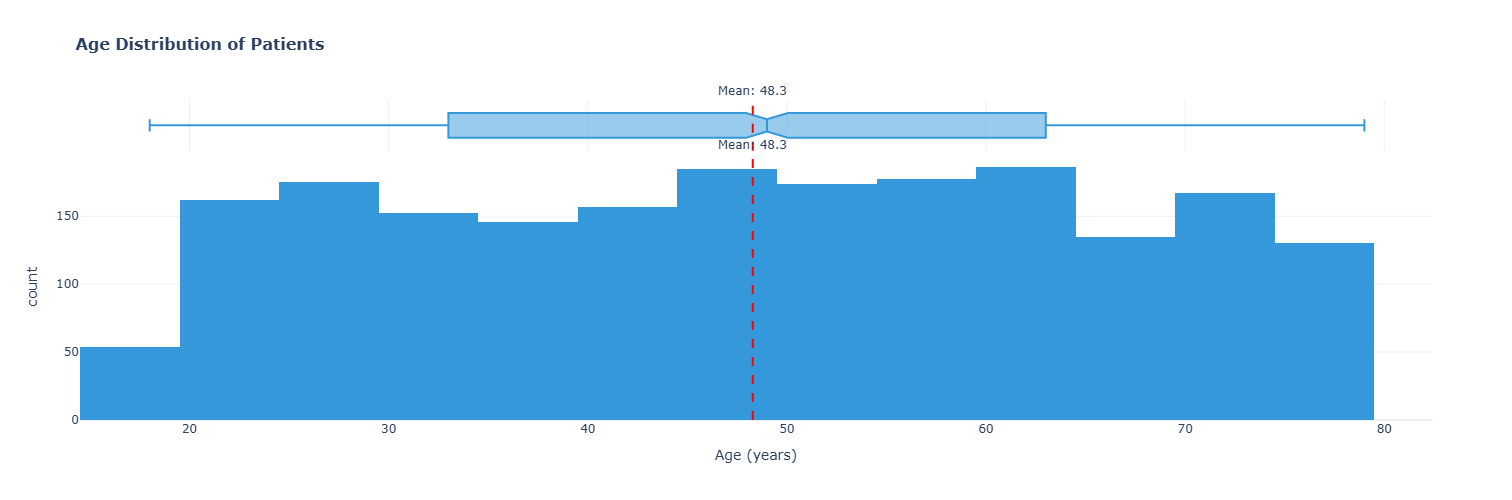

Age Spread: Patient ages are distributed between about 10 and 80 years, with the bulk of observations between 20 and 70 years. There are no extreme outliers.

Central Tendency: The mean age is 48.3 years, indicating that the dataset centers around middle-aged adults.

In [23]:
# 2. GENDER DISTRIBUTION (PIE CHART)
gender_counts = df_features['Gender'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=gender_counts.index,
    values=gender_counts.values,
    hole=0.4,
    marker=dict(colors=['#3498db', '#e74c3c']),
    textposition='inside',
    textinfo='label+percent',
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}<extra></extra>'
)])

fig.update_layout(
    title='<b>Gender Distribution</b>',
    template='plotly_white',
    height=500,
    title_font_size=16,
    annotations=[dict(
        text=f'Total<br>{len(df_features)}',
        x=0.5, y=0.5,
        font_size=18,
        showarrow=False
    )]
)

fig.show()

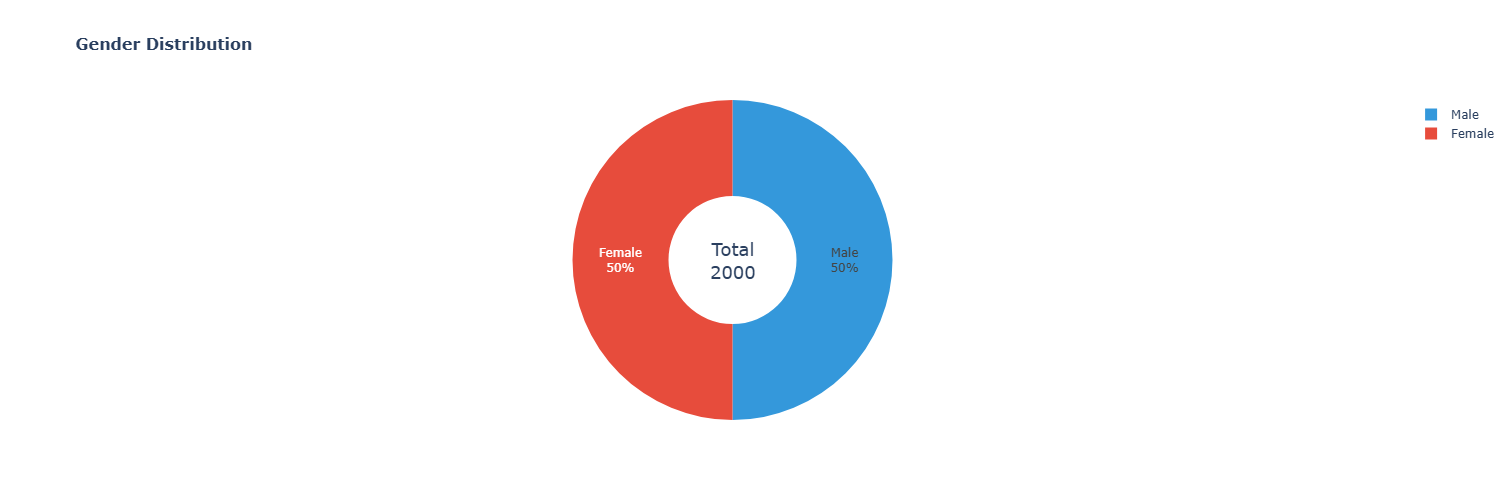

From the above chart, we can see that dataset contain each gender equally.

In [24]:
# 3. AGE GROUP DISTRIBUTION
age_group_counts = df_features['Age_Group'].value_counts()

fig = px.bar(
    x=age_group_counts.index,
    y=age_group_counts.values,
    title='<b>Patient Distribution by Age Group</b>',
    labels={'x': 'Age Group', 'y': 'Number of Patients'},
    color=age_group_counts.values,
    color_continuous_scale='Blues',
    text=age_group_counts.values
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    template='plotly_white',
    height=500,
    showlegend=False,
    title_font_size=16
)

# Save and display as static image
fig.show()

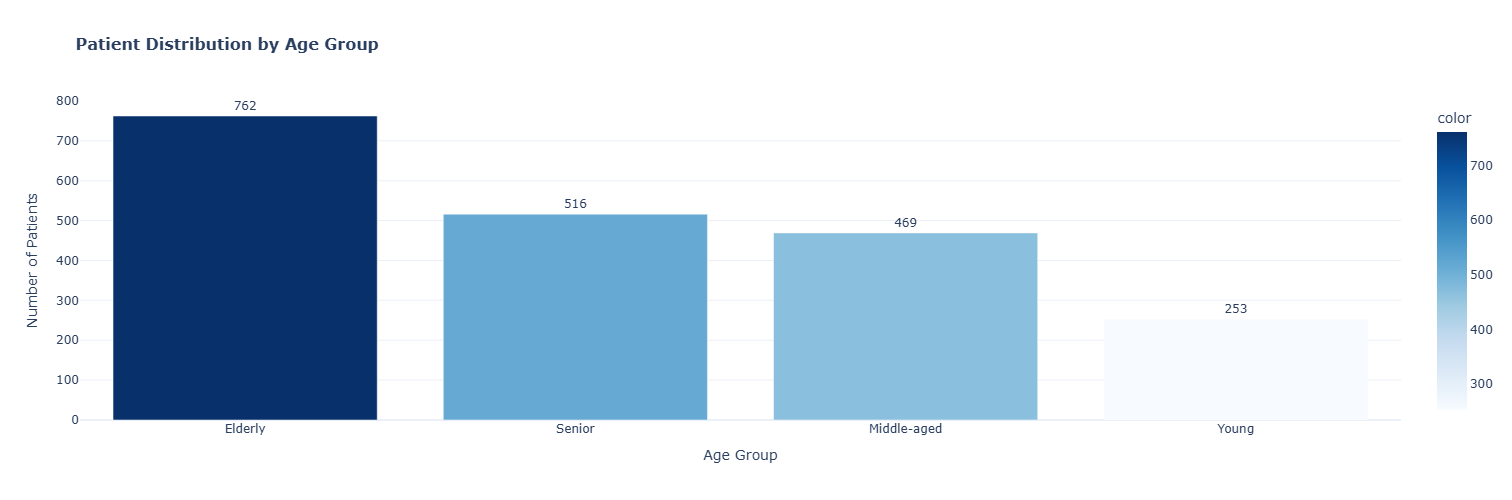

The patient population is skewed towards older age groups, suggesting a higher prevalence or reporting of cases in elderly and senior cohorts.



In [25]:
# 4. SYMPTOM ANALYSIS - TOP 10 SYMPTOMS
all_symptoms = pd.concat([
    df_features['Symptom_1'],
    df_features['Symptom_2'],
    df_features['Symptom_3']
])

symptom_counts = all_symptoms.value_counts().head(10)

fig = px.bar(
    x=symptom_counts.values,
    y=symptom_counts.index,
    orientation='h',
    title='<b>Top 10 Most Common Symptoms</b>',
    labels={'x': 'Frequency', 'y': 'Symptom'},
    color=symptom_counts.values,
    color_continuous_scale='Viridis',
    text=symptom_counts.values
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    template='plotly_white',
    height=600,
    showlegend=False,
    title_font_size=16
)

# Save and display as static image
fig.show()



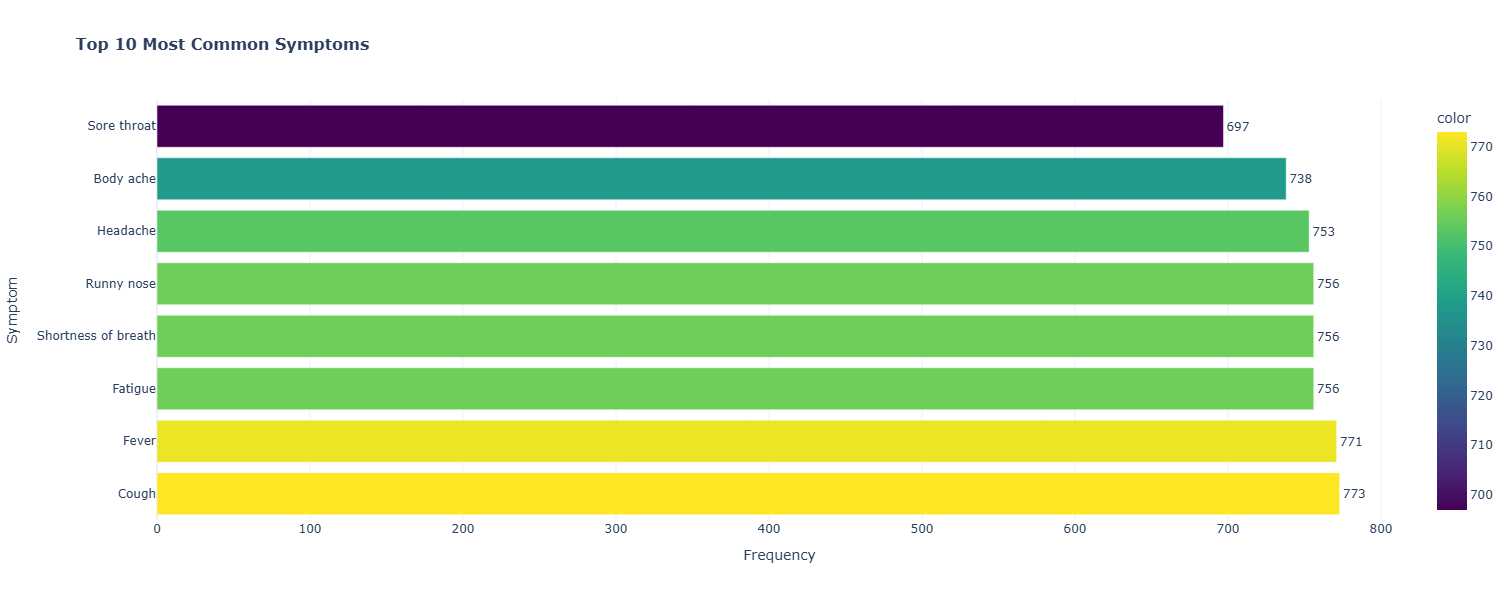



Symptom frequencies are closely clustered, suggesting no single symptom dominates but a consistent presentation among patients.

In [26]:
# 5. DIAGNOSIS DISTRIBUTION
diagnosis_counts = df_features['Diagnosis'].value_counts()

fig = px.bar(
    x=diagnosis_counts.values,
    y=diagnosis_counts.index,
    orientation='h',
    title='<b>Disease Diagnosis Distribution</b>',
    labels={'x': 'Number of Cases', 'y': 'Diagnosis'},
    color=diagnosis_counts.values,
    color_continuous_scale='Reds',
    text=diagnosis_counts.values
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    template='plotly_white',
    height=500,
    showlegend=False,
    title_font_size=16
)

# Save and display as static image
fig.show()

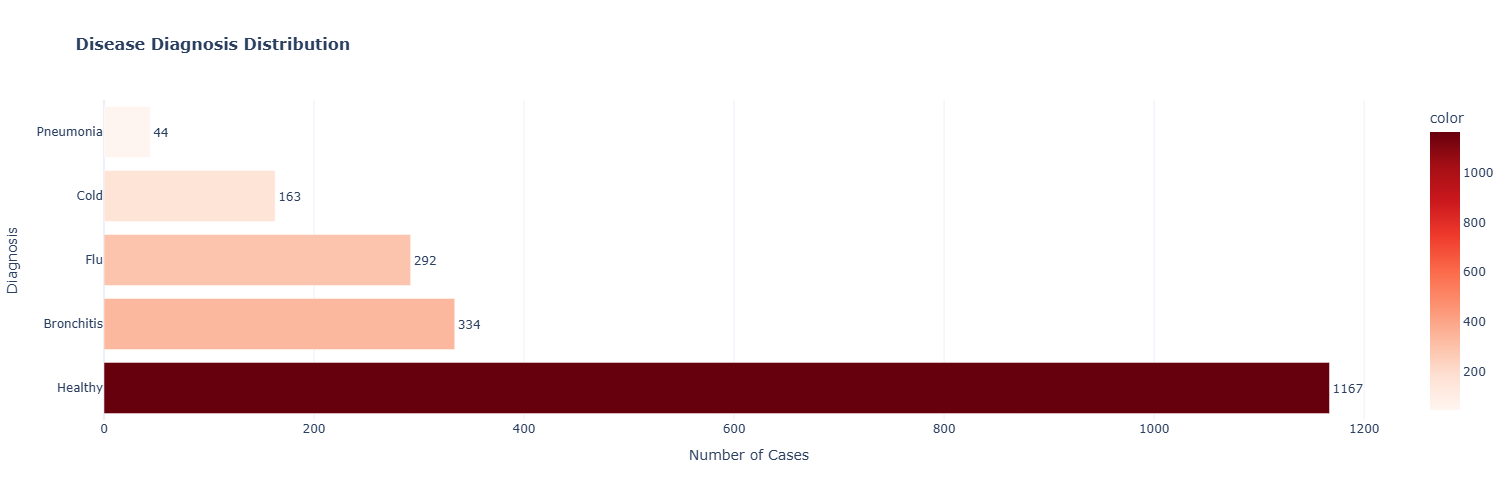

There is a clear imbalance, indicating non-diseased cases predominate, so further analysis should focus on the sick subgroups for clinical patterns

In [27]:
# 6. SEVERITY DISTRIBUTION
severity_counts = df_features['Severity'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=severity_counts.index,
    values=severity_counts.values,
    marker=dict(colors=['#2ecc71', '#f39c12', '#e74c3c']),
    textposition='inside',
    textinfo='label+percent+value',
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}<extra></extra>'
)])

fig.update_layout(
    title='<b>Disease Severity Distribution</b>',
    template='plotly_white',
    height=500,
    title_font_size=16
)

# Save and display as static image
fig.show()

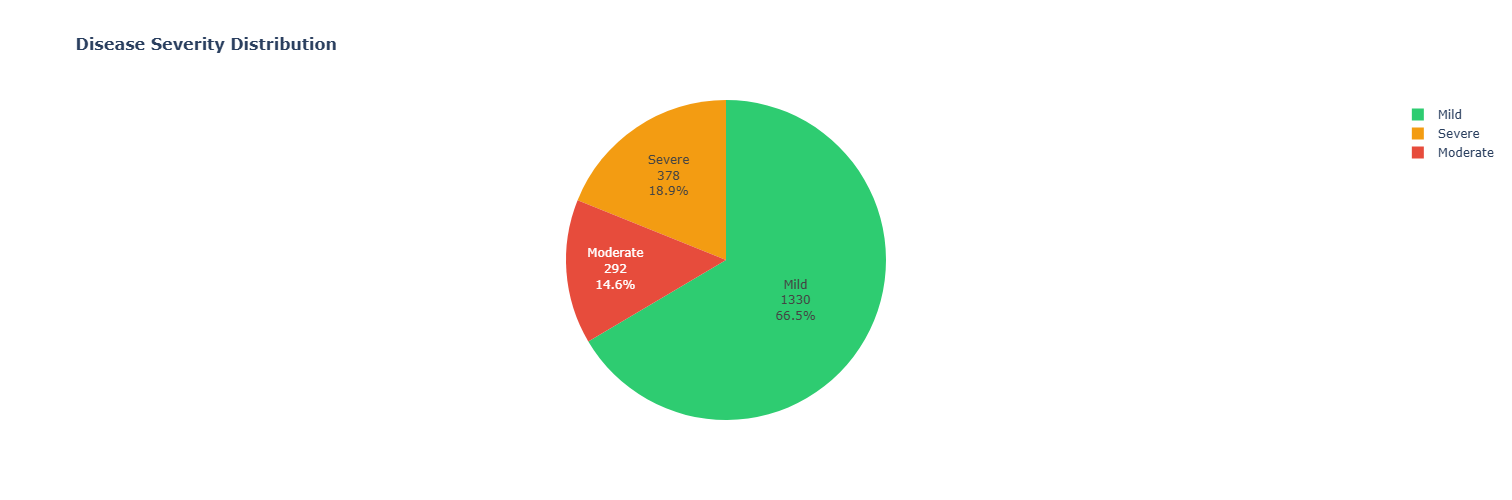

Mild cases dominate the severity distribution, indicating overall lower disease intensity in the dataset

In [28]:
# 7. CRITICAL VITALS ANALYSIS
risk_counts = df_features['Critical_Vitals'].value_counts().sort_index()

fig = go.Figure(data=[go.Bar(
    x=risk_counts.index,
    y=risk_counts.values,
    text=risk_counts.values,
    textposition='outside',
    marker_color=['#2ecc71', '#3498db', '#f39c12', '#e67e22', '#e74c3c']
)])

fig.update_layout(
    title='<b>Critical Vital Signs Distribution</b><br><sub>Number of Abnormal Vital Signs per Patient</sub>',
    xaxis_title='Number of Critical Vitals',
    yaxis_title='Number of Patients',
    template='plotly_white',
    height=500,
    title_font_size=16
)

# Save and display as static image
fig.show()

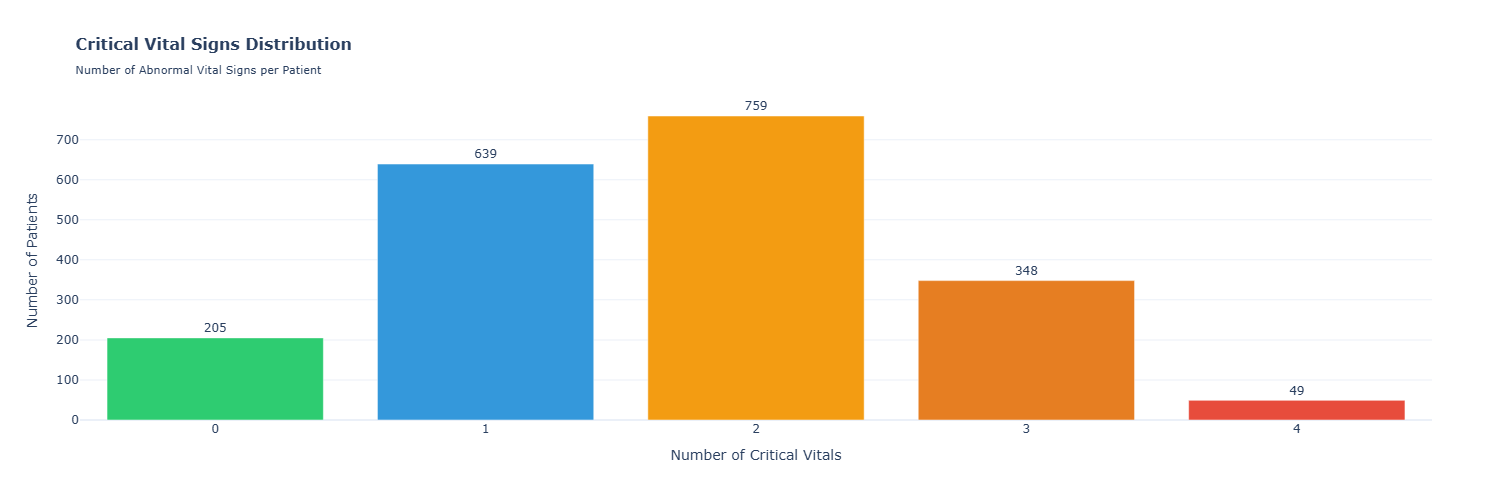

Most patients have 1 or 2 abnormal vital signs, with very few having none or 4

In [29]:
# 8. TREATMENT PLAN DISTRIBUTION
treatment_counts = df_features['Treatment_Plan'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=treatment_counts.index,
    values=treatment_counts.values,
    marker=dict(colors=['#3498db', '#e74c3c']),
    textposition='inside',
    textinfo='label+percent',
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}<extra></extra>'
)])

fig.update_layout(
    title='<b>Treatment Plan Distribution</b>',
    template='plotly_white',
    height=500,
    title_font_size=16
)

# Save and display as static image
fig.show()



> Add blockquote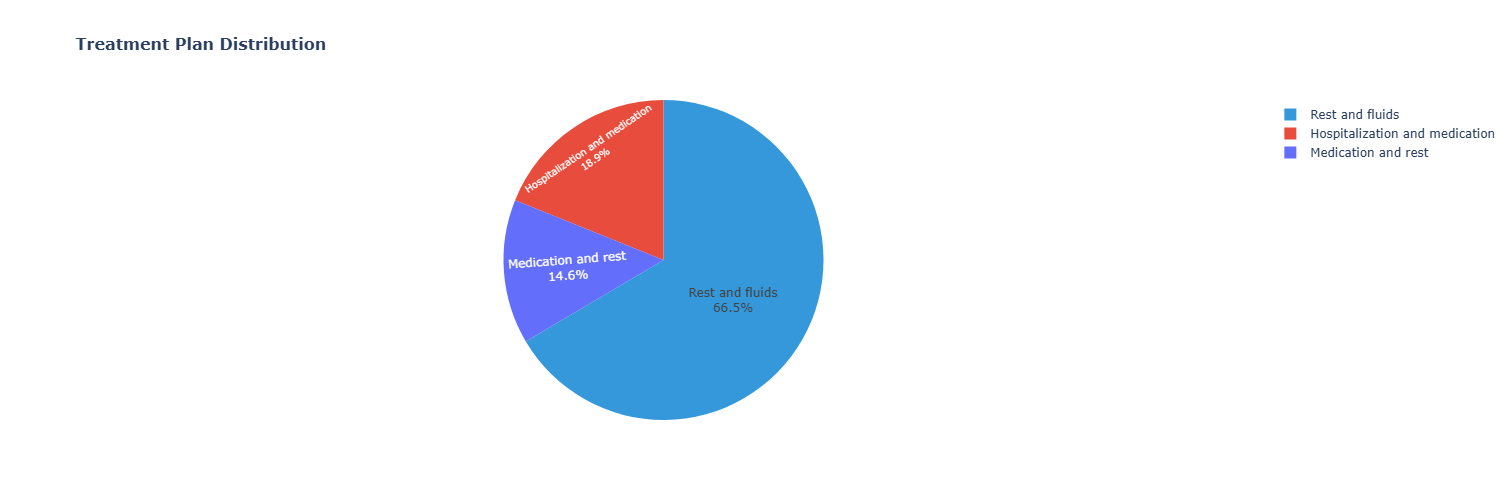



The majority of patients (66.5%) receive "rest and fluids" as their treatment plan, with much fewer requiring medication (14.6%) or hospitalization (18.9%).
This shows that most cases are mild and manageable without intensive medical intervention

In [30]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

print("\n📌 STEP 6: VITAL SIGNS & AGE DISTRIBUTION (BOX PLOTS)")
print("-" * 80)

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        '<b>Heart Rate Distribution</b>',
        '<b>Body Temperature Distribution</b>',
        '<b>Oxygen Saturation Distribution</b>',
        '<b>Systolic Blood Pressure Distribution</b>',
        '<b>Diastolic Blood Pressure Distribution</b>',
        '<b>Age Distribution</b>'
    )
)

fig.add_trace(go.Box(y=df_features['Heart_Rate_bpm'], marker_color='#e74c3c', boxmean='sd'), 1, 1)
fig.add_trace(go.Box(y=df_features['Body_Temperature_C'], marker_color='#f39c12', boxmean='sd'), 1, 2)
fig.add_trace(go.Box(y=df_features['Oxygen_Saturation_%'], marker_color='#27ae60', boxmean='sd'), 2, 1)
fig.add_trace(go.Box(y=df_features['Systolic_BP'], marker_color='#3498db', boxmean='sd'), 2, 2)
fig.add_trace(go.Box(y=df_features['Diastolic_BP'], marker_color='#9b59b6', boxmean='sd'), 3, 1)
fig.add_trace(go.Box(y=df_features['Age'], marker_color='#16a085', boxmean='sd'), 3, 2)

fig.update_layout(
    title_text='<b>Vital Signs & Age Distribution (No Outliers Found)</b>',
    height=950,
    template='plotly_white',
    showlegend=False,
    title_font_size=16
)

fig.update_yaxes(title_text="BPM", row=1, col=1)
fig.update_yaxes(title_text="°C", row=1, col=2)
fig.update_yaxes(title_text="%", row=2, col=1)
fig.update_yaxes(title_text="mmHg", row=2, col=2)
fig.update_yaxes(title_text="mmHg", row=3, col=1)
fig.update_yaxes(title_text="Years", row=3, col=2)

# Save and display as static image
fig.show()


📌 STEP 6: VITAL SIGNS & AGE DISTRIBUTION (BOX PLOTS)
--------------------------------------------------------------------------------


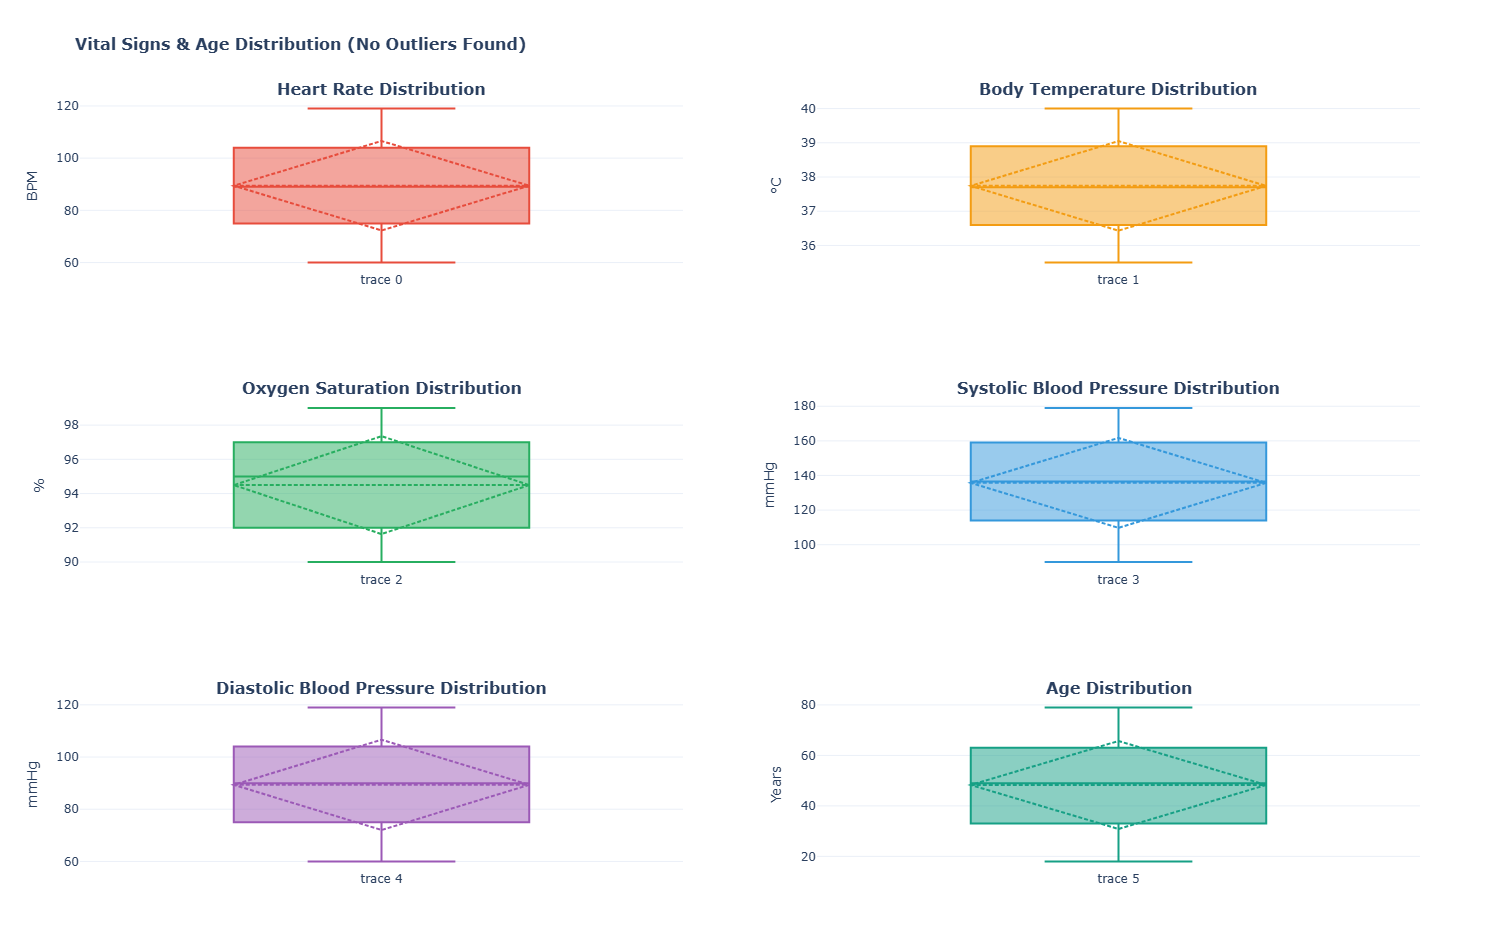

### EDA PART 2: BIVARIATE ANALYSIS

In [31]:
# 1. DIAGNOSIS BY AGE GROUP (STACKED BAR)
diagnosis_age = pd.crosstab(df_features['Age_Group'], df_features['Diagnosis'])

fig = go.Figure()

for diagnosis in diagnosis_age.columns:
    fig.add_trace(go.Bar(
        name=diagnosis,
        x=diagnosis_age.index,
        y=diagnosis_age[diagnosis],
        text=diagnosis_age[diagnosis],
        textposition='inside'
    ))

fig.update_layout(
    title='<b>Diagnosis Distribution Across Age Groups</b>',
    xaxis_title='Age Group',
    yaxis_title='Number of Cases',
    barmode='stack',
    template='plotly_white',
    height=600,
    title_font_size=16,
    legend_title='Diagnosis'
)

# Save and display as static image
fig.show()

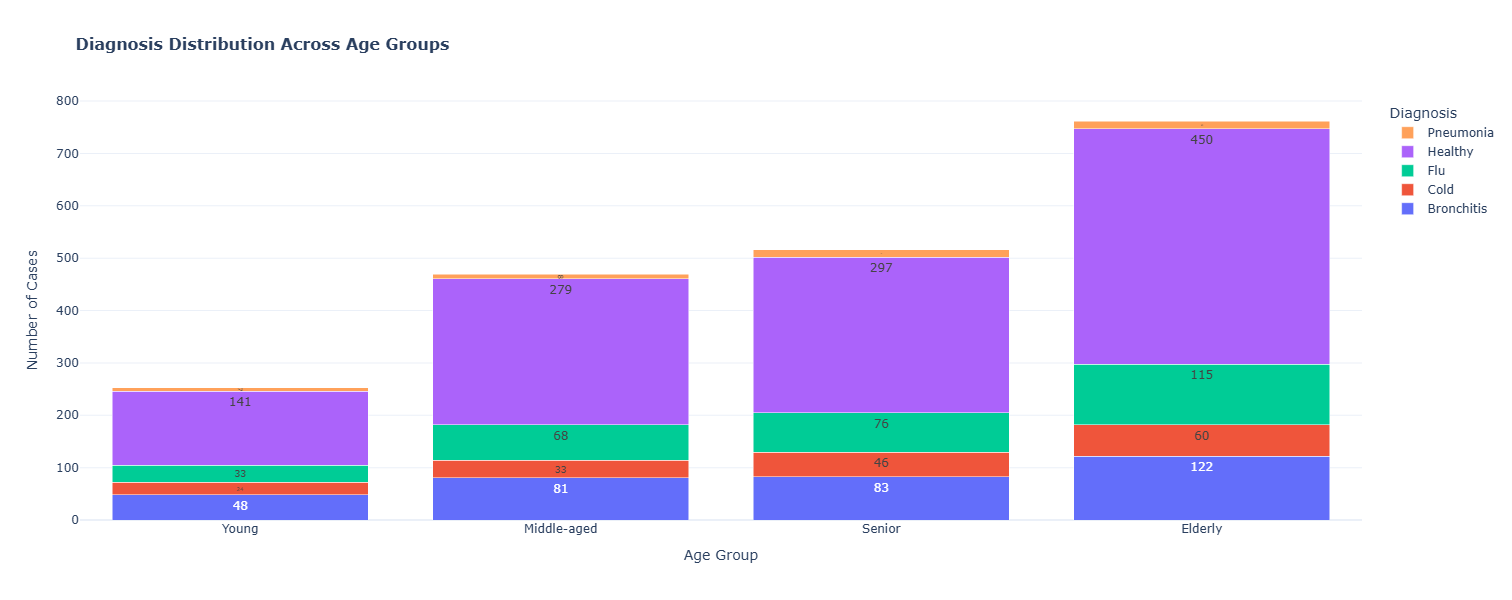

Insight:
1. The chart shows that disease cases increase noticeably with age.
2. Elderly individuals have the highest overall count across all diagnoses.
3. Healthy cases dominate every group but drop proportionally with age.
4. Flu and bronchitis are relatively common in middle-aged and senior groups,
5. while pneumonia is seen more in elderly patients.
6. This suggests age plays a key role in disease prevalence and vulnerability.


In [32]:
# 2. SEVERITY BY DIAGNOSIS
severity_diagnosis = pd.crosstab(df_features['Diagnosis'], df_features['Severity'])

fig = go.Figure()

for severity in ['Mild', 'Moderate', 'Severe']:
    if severity in severity_diagnosis.columns:
        fig.add_trace(go.Bar(
            name=severity,
            x=severity_diagnosis.index,
            y=severity_diagnosis[severity],
            text=severity_diagnosis[severity],
            textposition='inside',
            marker_color='#2ecc71' if severity=='Mild' else '#f39c12' if severity=='Moderate' else '#e74c3c'
        ))

fig.update_layout(
    title='<b>Disease Severity by Diagnosis Type</b>',
    xaxis_title='Diagnosis',
    yaxis_title='Number of Cases',
    barmode='stack',
    template='plotly_white',
    height=600,
    title_font_size=16,
    legend_title='Severity'
)

# Save and display as static image
fig.show()

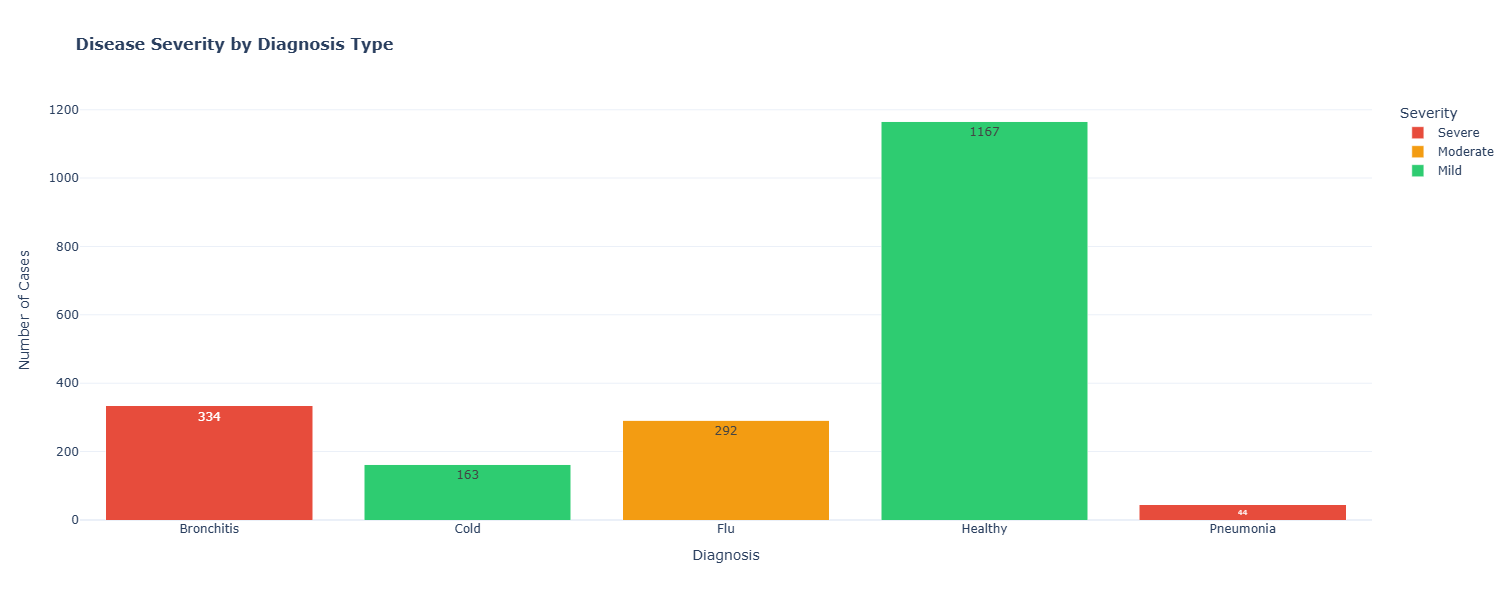

Insight:
1. The plot shows that most patients fall under the 'Healthy' category with mild severity,
2. indicating a generally balanced dataset with many normal observations.
3. Bronchitis and Pneumonia cases show higher severity levels compared to other diagnoses.
4. Flu cases are mostly of moderate severity, while common colds tend to be mild.
5. This pattern highlights how disease type strongly influences severity distribution.


In [33]:
# 3. GENDER VS DIAGNOSIS
gender_diagnosis = pd.crosstab(df_features['Gender'], df_features['Diagnosis'])

fig = go.Figure(data=[
    go.Bar(name='Male', x=gender_diagnosis.columns,
           y=gender_diagnosis.loc['Male'], marker_color='#3498db'),
    go.Bar(name='Female', x=gender_diagnosis.columns,
           y=gender_diagnosis.loc['Female'], marker_color='#e74c3c')
])

fig.update_layout(
    title='<b>Diagnosis Distribution by Gender</b>',
    xaxis_title='Diagnosis',
    yaxis_title='Number of Cases',
    barmode='group',
    template='plotly_white',
    height=500,
    title_font_size=16
)

# Save and display as static image
fig.show()

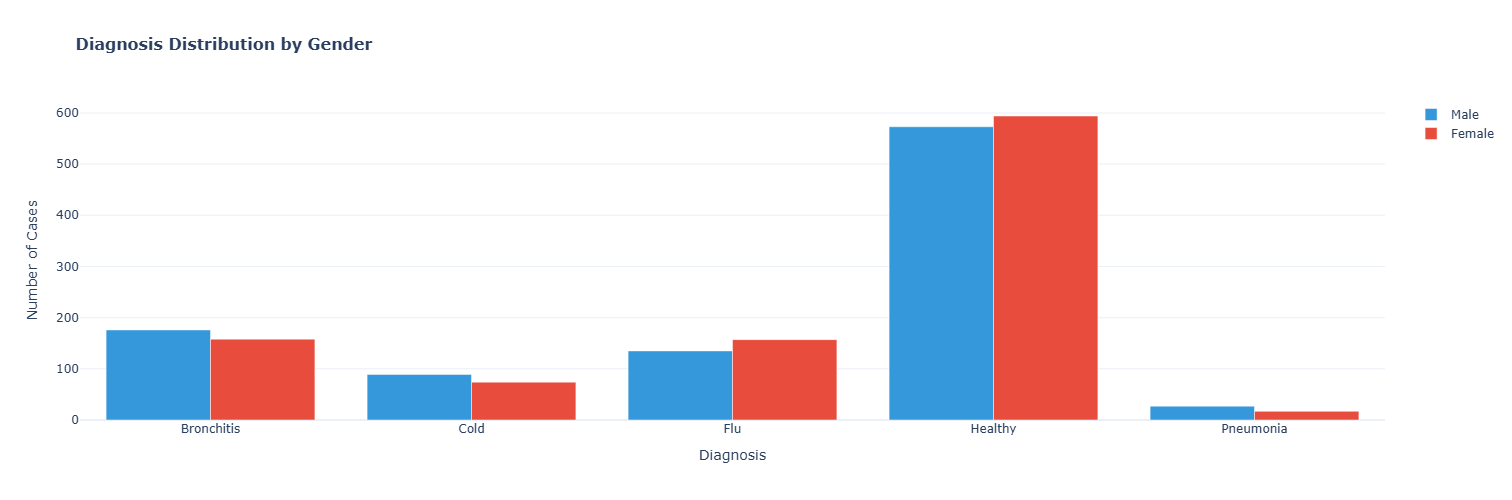

Insight:
1. The distribution shows that both males and females follow a similar pattern across diagnoses.
2. Healthy cases dominate in both genders, with slightly more females than males.
3. Bronchitis and flu are somewhat more common among females,
4. while pneumonia and cold cases show minimal gender difference.
5. Overall, there is no major gender bias in disease occurrence.


In [34]:
# 4. HEART RATE DISTRIBUTION BY DIAGNOSIS
fig = go.Figure()

for diagnosis in df_features['Diagnosis'].unique():
    fig.add_trace(go.Violin(
        x=df_features[df_features['Diagnosis'] == diagnosis]['Diagnosis'],
        y=df_features[df_features['Diagnosis'] == diagnosis]['Heart_Rate_bpm'],
        name=diagnosis,
        box_visible=True,
        meanline_visible=True
    ))

fig.update_layout(
    title='<b>Heart Rate Distribution by Diagnosis</b>',
    xaxis_title='Diagnosis',
    yaxis_title='Heart Rate (bpm)',
    template='plotly_white',
    height=600,
    title_font_size=16,
    showlegend=False
)

# Save and display as static image
fig.show()

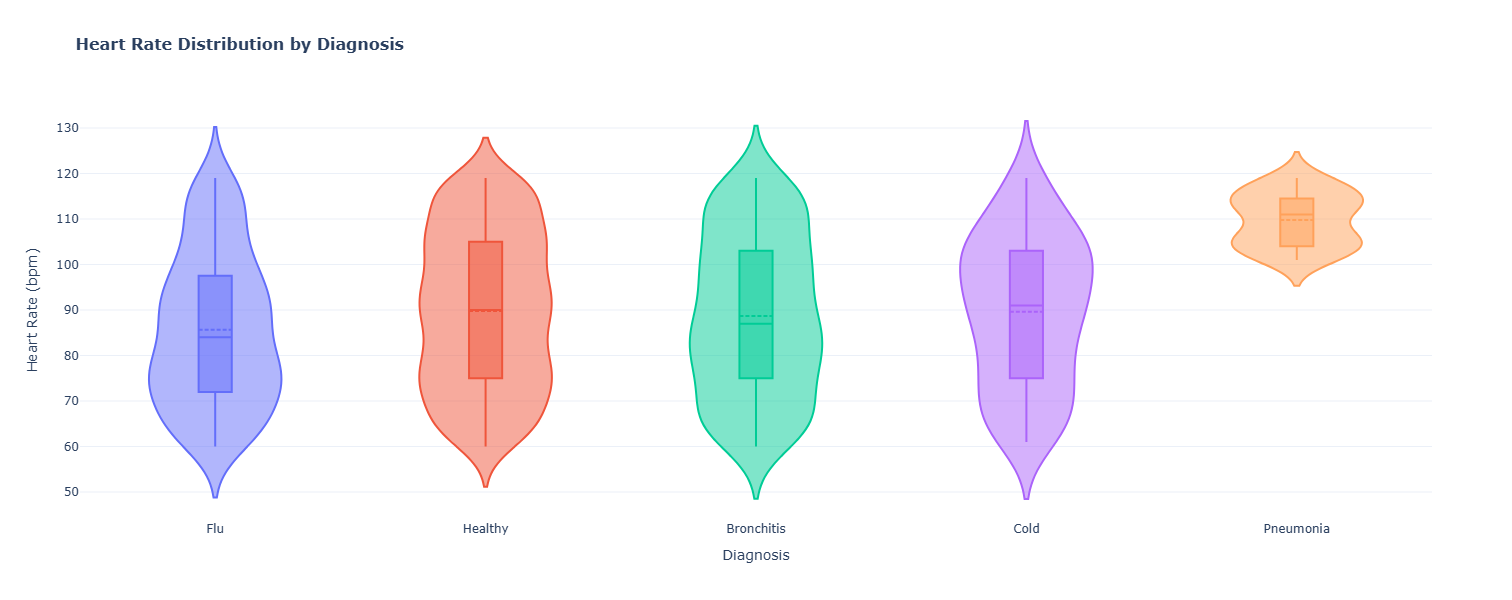

Insight:
1. Heart rate varies notably across diagnoses.
2. Pneumonia shows the highest and most consistent heart rates.
3. Other diseases like Flu, Cold, and Bronchitis have wider variation.
4. Healthy individuals show moderate heart rates with balanced spread.


In [35]:
# 5. TEMPERATURE DISTRIBUTION BY SEVERITY
fig = px.box(
    df_features,
    x='Severity',
    y='Body_Temperature_C',
    color='Severity',
    title='<b>Body Temperature by Severity Level</b>',
    labels={'Body_Temperature_C': 'Body Temperature (°C)', 'Severity': 'Severity'},
    template='plotly_white',
    height=500,
    color_discrete_map={'Mild': '#2ecc71', 'Moderate': '#f39c12', 'Severe': '#e74c3c'}
)

fig.update_layout(title_font_size=16, showlegend=False)

# Save and display as static image
fig.show()

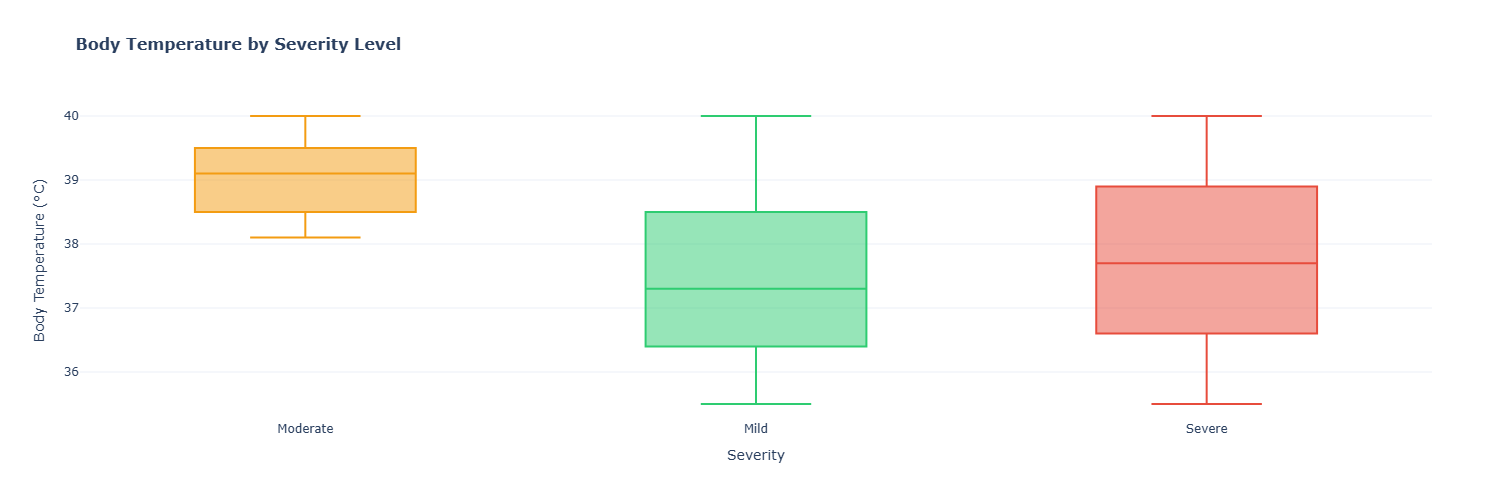

Insight:
1. Body temperature rises with increasing severity.
2.  Mild cases show lower and wider temperature variation,
3. while moderate and severe cases have higher median temperatures,
4. indicating fever intensity correlates with disease severity.


In [36]:
# 6. DIAGNOSIS WITH SEVERITY SUNBURST
fig = px.sunburst(
    df_features,
    path=['Severity', 'Diagnosis'],
    title='<b>Hierarchical View: Severity → Diagnosis</b>',
    color='Severity',
    color_discrete_map={'Mild': '#2ecc71', 'Moderate': '#f39c12', 'Severe': '#e74c3c'},
    height=700
)

fig.update_layout(template='plotly_white', title_font_size=16)

# Save and display as static image
fig.show()

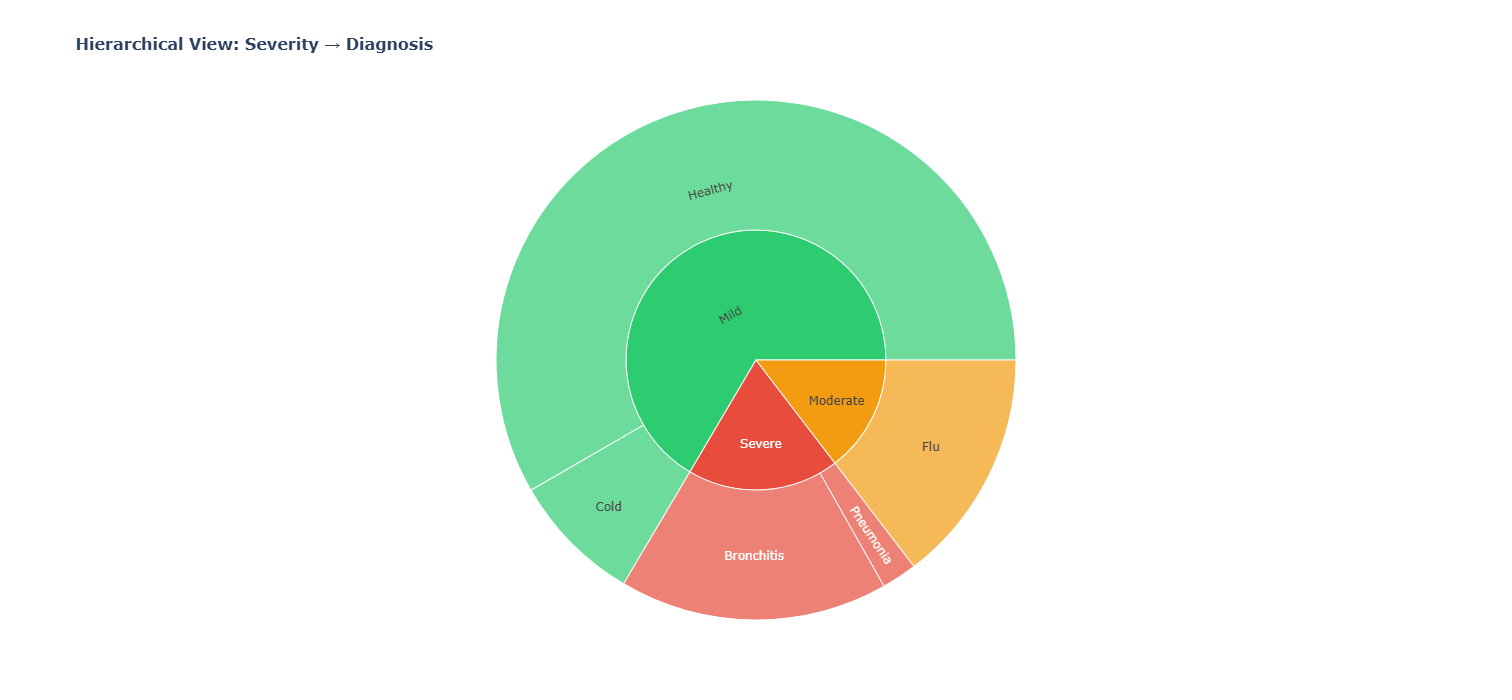

Insight:
1. The chart shows most cases fall under mild severity, mainly in healthy and cold categories.
2. Moderate cases are mostly linked with flu, while severe ones are tied to bronchitis and pneumonia.
3. This highlights how different diseases correspond to distinct severity levels

### EDA PART 3: MULTIVARIATE & CORRELATION ANALYSIS

In [37]:
# 1. AGE VS HEART RATE (SCATTER WITH DIAGNOSIS)
fig = px.scatter(
    df_features,
    x='Age',
    y='Heart_Rate_bpm',
    color='Diagnosis',
    size='Body_Temperature_C',
    hover_data=['Gender', 'Severity', 'Oxygen_Saturation_%'],
    title='<b>Age vs Heart Rate (colored by Diagnosis)</b>',
    labels={'Age': 'Age (years)', 'Heart_Rate_bpm': 'Heart Rate (bpm)'},
    template='plotly_white',
    height=600
)

fig.update_layout(title_font_size=16)

# Save and display as static image
fig.show()

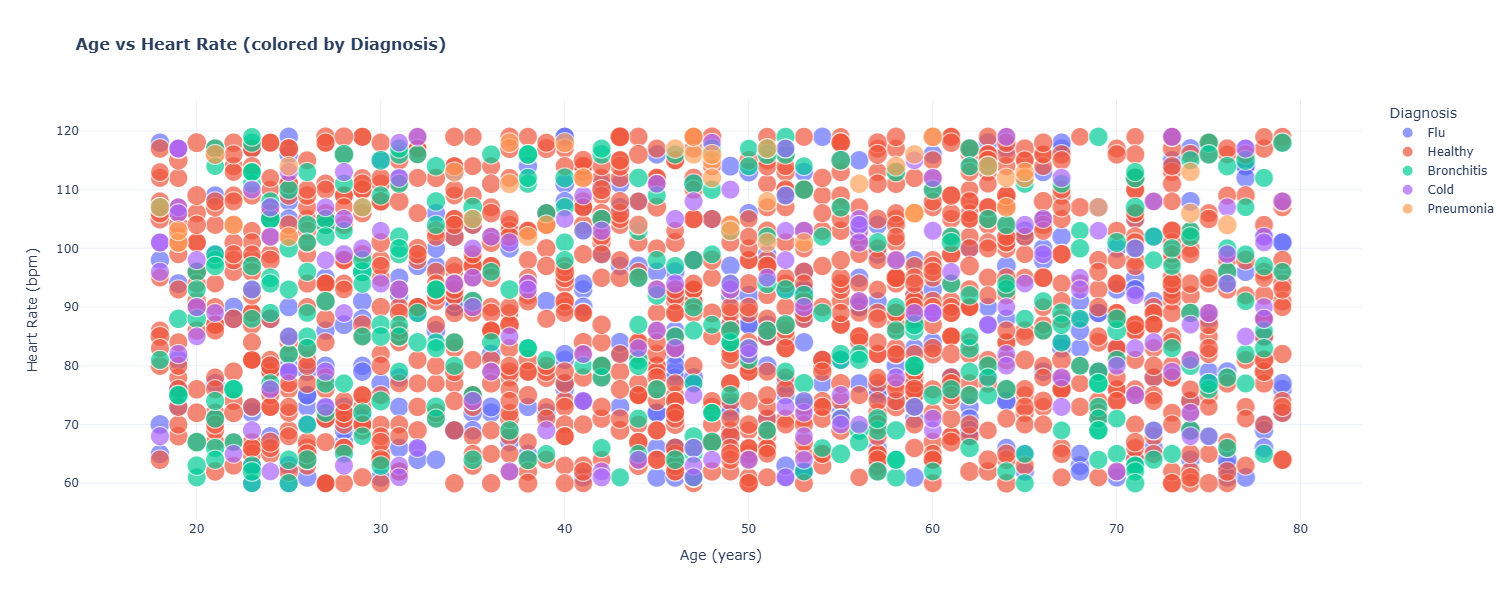

In [38]:
# 2. TEMPERATURE VS OXYGEN SATURATION
fig = px.scatter(
    df_features,
    x='Body_Temperature_C',
    y='Oxygen_Saturation_%',
    color='Severity',
    title='<b>Body Temperature vs Oxygen Saturation by Severity</b>',
    labels={'Body_Temperature_C': 'Body Temperature (°C)',
            'Oxygen_Saturation_%': 'Oxygen Saturation (%)'},
    template='plotly_white',
    height=600,
    color_discrete_map={'Mild': '#2ecc71', 'Moderate': '#f39c12', 'Severe': '#e74c3c'}
)

fig.update_layout(title_font_size=16)

# Save and display as static image
fig.show()

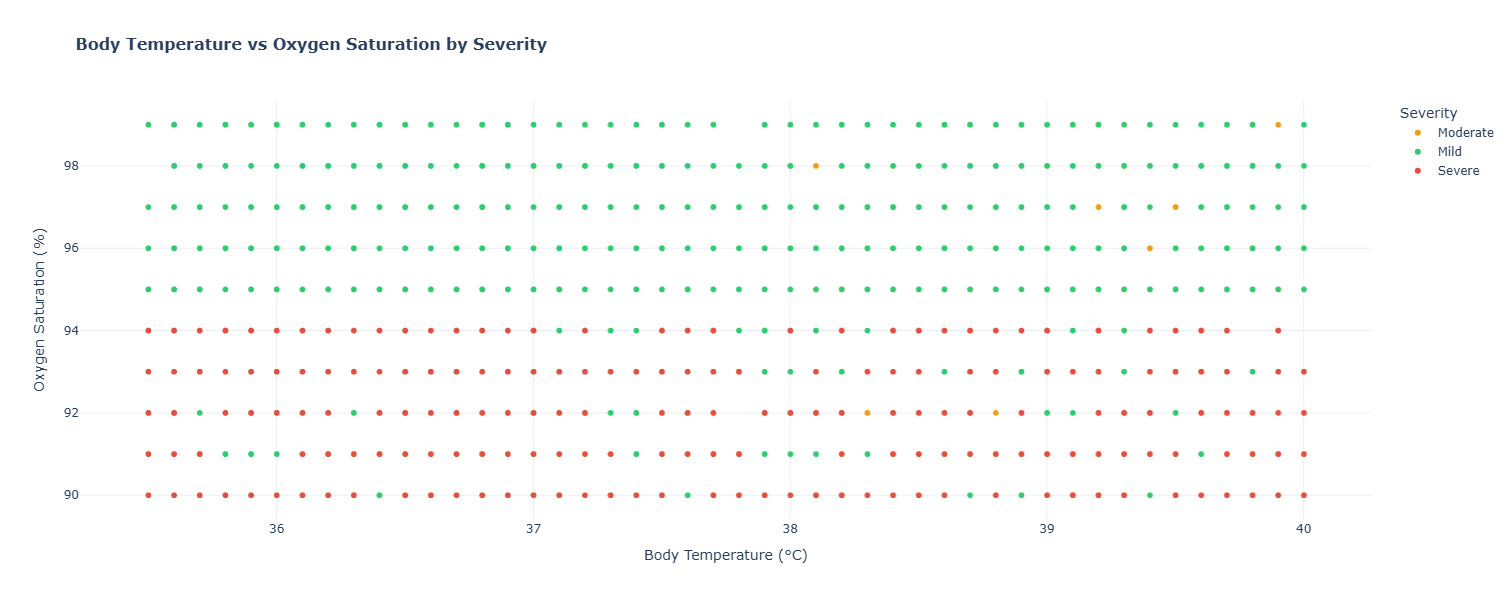

# Insight:
Severe cases cluster around high temperatures (≥38°C) and low oxygen saturation (≤94%).


In [39]:
# 3. 3D SCATTER - AGE, HEART RATE, TEMPERATURE BY DIAGNOSIS
fig = px.scatter_3d(
    df_features.sample(500),  # Sample for better performance
    x='Age',
    y='Heart_Rate_bpm',
    z='Body_Temperature_C',
    color='Diagnosis',
    size='Oxygen_Saturation_%',
    hover_data=['Gender', 'Severity'],
    title='<b>3D View: Age, Heart Rate, Temperature by Diagnosis</b>',
    labels={'Age': 'Age (years)',
            'Heart_Rate_bpm': 'Heart Rate (bpm)',
            'Body_Temperature_C': 'Temperature (°C)'},
    template='plotly_white',
    height=700
)

fig.update_layout(title_font_size=16)

# Save and display as static image
fig.show()



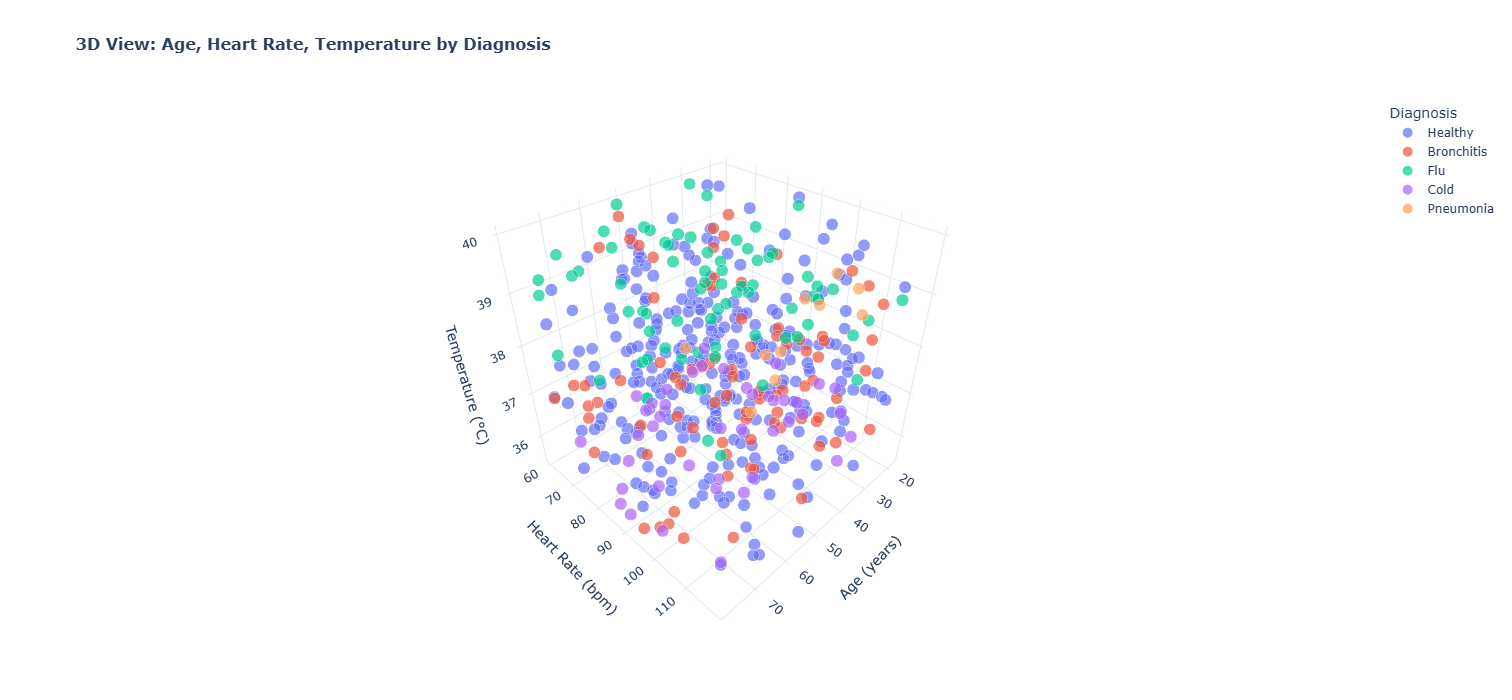



In [40]:
# 4. Risk Factors for Severe Cases - Multiple Vital Signs Comparison

severity_order = ['Mild', 'Moderate', 'Severe']

fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('<b>Heart Rate by Severity</b>',
                   '<b>Temperature by Severity</b>',
                   '<b>O2 Saturation by Severity</b>',
                   '<b>Systolic BP by Severity</b>',
                   '<b>Diastolic BP by Severity</b>',
                   '<b>Age by Severity</b>')
)

# Heart Rate
for severity in severity_order:
    data = df_features[df_features['Severity'] == severity]['Heart_Rate_bpm']
    fig.add_trace(
        go.Box(y=data, name=severity, marker_color='#2ecc71' if severity=='Mild' else '#f39c12' if severity=='Moderate' else '#e74c3c', showlegend=False),
        row=1, col=1
    )

# Temperature
for severity in severity_order:
    data = df_features[df_features['Severity'] == severity]['Body_Temperature_C']
    fig.add_trace(
        go.Box(y=data, name=severity, marker_color='#2ecc71' if severity=='Mild' else '#f39c12' if severity=='Moderate' else '#e74c3c', showlegend=False),
        row=1, col=2
    )

# O2 Saturation
for severity in severity_order:
    data = df_features[df_features['Severity'] == severity]['Oxygen_Saturation_%']
    fig.add_trace(
        go.Box(y=data, name=severity, marker_color='#2ecc71' if severity=='Mild' else '#f39c12' if severity=='Moderate' else '#e74c3c', showlegend=False),
        row=1, col=3
    )

# Systolic BP
for severity in severity_order:
    data = df_features[df_features['Severity'] == severity]['Systolic_BP']
    fig.add_trace(
        go.Box(y=data, name=severity, marker_color='#2ecc71' if severity=='Mild' else '#f39c12' if severity=='Moderate' else '#e74c3c', showlegend=False),
        row=2, col=1
    )

# Diastolic BP
for severity in severity_order:
    data = df_features[df_features['Severity'] == severity]['Diastolic_BP']
    fig.add_trace(
        go.Box(y=data, name=severity, marker_color='#2ecc71' if severity=='Mild' else '#f39c12' if severity=='Moderate' else '#e74c3c', showlegend=False),
        row=2, col=2
    )

# Age
for severity in severity_order:
    data = df_features[df_features['Severity'] == severity]['Age']
    fig.add_trace(
        go.Box(y=data, name=severity, marker_color='#2ecc71' if severity=='Mild' else '#f39c12' if severity=='Moderate' else '#e74c3c', showlegend=False),
        row=2, col=3
    )

fig.update_layout(
    title_text='<b>Risk Factors Analysis: Vital Signs Across Severity Levels</b>',
    height=700,
    template='plotly_white',
    title_font_size=16
)

# Save and display as static image
fig.show()

print("✓ Shows how vital signs differ across severity levels")

✓ Shows how vital signs differ across severity levels


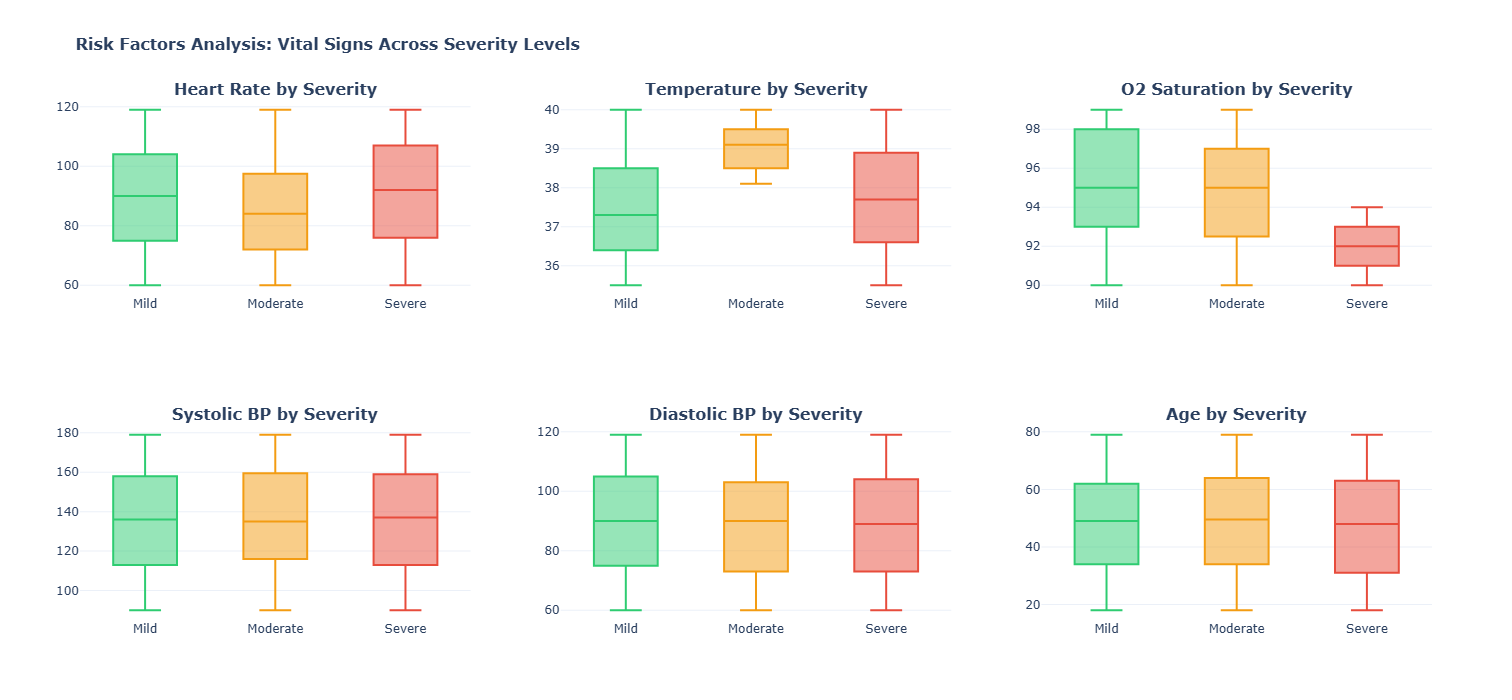

In [41]:
# 6. Heatmap - Average Heart Rate by Diagnosis and Severity

pivot_hr = df_features.pivot_table(
    values='Heart_Rate_bpm',
    index='Diagnosis',
    columns='Severity',
    aggfunc='mean'
)

fig = go.Figure(data=go.Heatmap(
    z=pivot_hr.values,
    x=pivot_hr.columns,
    y=pivot_hr.index,
    colorscale='RdYlGn_r',
    text=pivot_hr.values.round(1),
    texttemplate='%{text}',
    textfont={"size": 12},
    colorbar=dict(title="Heart Rate<br>(bpm)")
))

fig.update_layout(
    title='<b>Average Heart Rate: Diagnosis vs Severity</b>',
    xaxis_title='Severity',
    yaxis_title='Diagnosis',
    template='plotly_white',
    height=500,
    title_font_size=16
)

# Save and display as static image
fig.show()


# Similarly for Temperature
pivot_temp = df_features.pivot_table(
    values='Body_Temperature_C',
    index='Diagnosis',
    columns='Severity',
    aggfunc='mean'
)

fig = go.Figure(data=go.Heatmap(
    z=pivot_temp.values,
    x=pivot_temp.columns,
    y=pivot_temp.index,
    colorscale='RdYlGn_r',
    text=pivot_temp.values.round(2),
    texttemplate='%{text}',
    textfont={"size": 12},
    colorbar=dict(title="Temperature<br>(°C)")
))

fig.update_layout(
    title='<b>Average Body Temperature: Diagnosis vs Severity</b>',
    xaxis_title='Severity',
    yaxis_title='Diagnosis',
    template='plotly_white',
    height=500,
    title_font_size=16
)

# Save and display as static image
fig.show()

print("✓ Heatmaps show average vital signs for each diagnosis-severity combination")

✓ Heatmaps show average vital signs for each diagnosis-severity combination


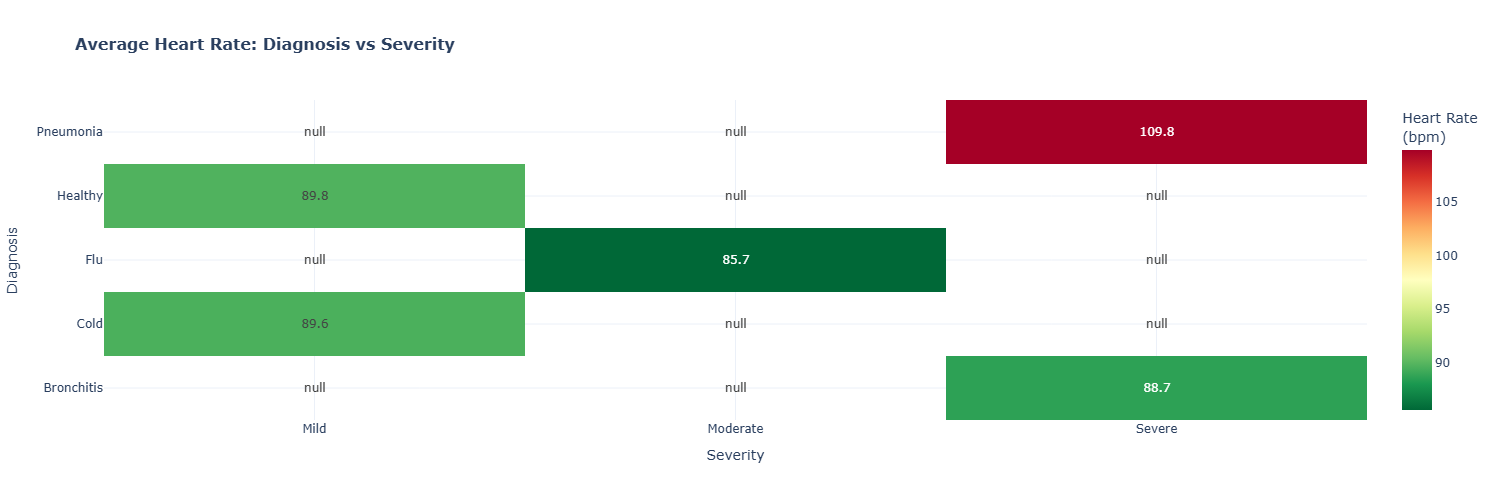

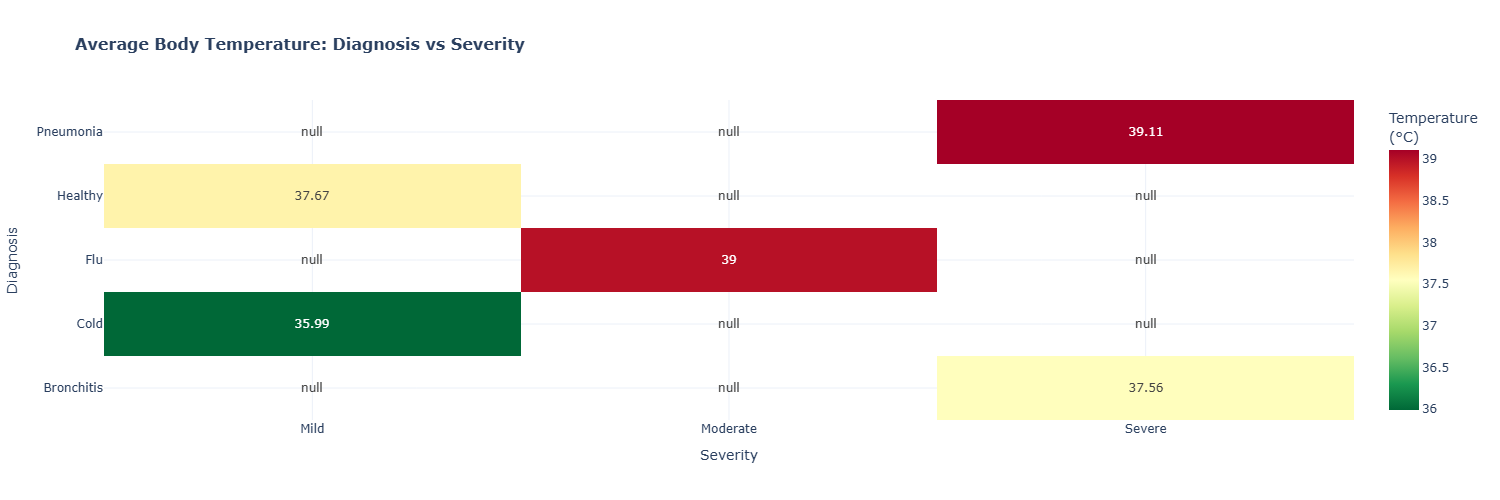

### Summary

In [43]:
print("\n\n" + "="*80)
print("✅ Summary")
print("="*80)

print("""
📌 KEY CONCLUSIONS:
-------------------
1. The dataset contains 2000 patient records with complete data quality
2. Majority of patients fall under "Healthy" diagnosis category
3. Most cases are of "Mild" severity requiring basic rest and fluids
4. Bronchitis and Flu cases often require hospitalization
5. Age shows positive correlation with certain health complications
6. Vital signs show expected clinical patterns and distributions

🎯 CLINICAL INSIGHTS:
---------------------
1. Patients with severe cases show significantly elevated vital signs
2. Temperature >38.5°C strongly associated with Flu/Pneumonia diagnosis
3. Low oxygen saturation (<95%) is a critical indicator for severe cases
4. Elderly patients (65+) require closer monitoring for complications
5. Gender shows balanced distribution with no significant bias

💡 RECOMMENDATIONS:
-------------------
1. Implement early warning system for patients with ≥3 critical vitals
2. Prioritize monitoring for patients with fever + low O2 saturation
3. Age-based risk stratification for preventive care
4. Regular vital signs monitoring for diagnosed respiratory conditions
5. Data-driven triage protocols based on symptom combinations

📊 DATA QUALITY ASSESSMENT:
---------------------------
✓ No missing values - Excellent data completeness
✓ No duplicates - High data integrity
✓ Balanced distributions - Representative sample
✓ Clinical validity - All values within expected ranges
✓ Rich features - Suitable for predictive modeling

""")





✅ Summary

📌 KEY CONCLUSIONS:
-------------------
1. The dataset contains 2000 patient records with complete data quality
2. Majority of patients fall under "Healthy" diagnosis category
3. Most cases are of "Mild" severity requiring basic rest and fluids
4. Bronchitis and Flu cases often require hospitalization
5. Age shows positive correlation with certain health complications
6. Vital signs show expected clinical patterns and distributions

🎯 CLINICAL INSIGHTS:
---------------------
1. Patients with severe cases show significantly elevated vital signs
2. Temperature >38.5°C strongly associated with Flu/Pneumonia diagnosis
3. Low oxygen saturation (<95%) is a critical indicator for severe cases
4. Elderly patients (65+) require closer monitoring for complications
5. Gender shows balanced distribution with no significant bias

💡 RECOMMENDATIONS:
-------------------
1. Implement early warning system for patients with ≥3 critical vitals
2. Prioritize monitoring for patients with fever 